In [27]:
# import json
# from yahoofinancials imp\`ort YahooFinancials as YF
import time
# import datetime
import pandas as pd
# from pandas_datareader import data
from pandas_datareader import data as pdr

# import yfinance as yf
# yf.pdr_override() # <== that's all it takes :-)

# from typing import List, Optional
import os
import pickle 
from tqdm import tqdm
import scipy.stats as sp
# from utils import *
import matplotlib.pyplot as plt
# import math

%matplotlib inline

In [33]:
!pip install requests-cache

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 17.8 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 18.6 kB/s eta 0:00:00a 0:00:01


In [28]:
def loadData(ticker,path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl"):
    savedData = {}
    with open(path, 'rb') as handle:
        savedData = pickle.load(handle)
    return savedData[ticker]
    
        
loadData('T')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560369,42149200
1,2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800
2,2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800
3,2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300640,36050300
4,2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100
...,...,...,...,...,...,...,...
236,2023-12-11,16.910000,16.940001,16.530001,16.620001,16.620001,43835000
237,2023-12-12,16.559999,16.580000,16.340000,16.410000,16.410000,41348800
238,2023-12-13,16.330000,16.500000,16.100000,16.450001,16.450001,53889700
239,2023-12-14,16.510000,16.809999,16.510000,16.650000,16.650000,54485000


In [64]:

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


from pandas_datareader.yahoo.headers import DEFAULT_HEADERS

import datetime

import requests_cache

expire_after = datetime.timedelta(days=3)

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)

session.headers = DEFAULT_HEADERS
current_date = datetime.datetime.now()
current_date_formatted = current_date.strftime("%Y-%m-%d")
first_day_of_year_formatted = datetime.datetime(current_date.year,1,1).strftime("%Y-%m-%d")
def getStocksData(ticker, start='1/1/2023', end='9/1/2023', save_new=False, saveToCSV=True):
    path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl"
    savedData = {}
    with open(path, 'rb') as handle:
        savedData = pickle.load(handle)

    if (save_new or ticker not in savedData):
        stock_data = pdr.get_data_yahoo(ticker, start=start,end=end, session=session)
        savedData[ticker] = stock_data # saved the stock data to our python dictionary
        with open(path, 'wb') as handle:
                    pickle.dump(savedData, handle,
                                protocol=pickle.HIGHEST_PROTOCOL)
    else:
        return savedData[ticker]
    return stock_data

current_date = datetime.datetime.now()
current_date_formatted = current_date.strftime("%Y-%m-%d")
first_day_of_year_formatted = datetime.datetime(current_date.year,1,1).strftime("%Y-%m-%d")

data = getStocksData('T', start=first_day_of_year_formatted, end=current_date_formatted, save_new=False)

In [79]:
df = data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,exp_short,exp_long,macd,macd_norm,position,position_diff,holdings,cash,total,cash_needed
0,2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560369,42149200,17.560369,17.560369,0.000000,0.185314,0.000000,0.000000,0.000000,1000.000000,1000.000000,NaN
1,2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800,17.618034,17.588134,0.029900,0.242171,24.217055,24.217055,456.975856,543.024144,1000.000000,456.975856
2,2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800,17.676919,17.618701,0.058218,0.296019,29.601858,5.384802,566.579534,439.959035,1006.538570,103.065109
3,2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300640,36050300,17.772876,17.669215,0.103661,0.382431,38.243100,8.641243,740.004000,272.750989,1012.754989,167.208046
4,2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100,17.823067,17.701059,0.122008,0.417318,41.731756,3.488656,802.918969,205.629256,1008.548225,67.121734


In [80]:
short = 12
long = 26
df['exp_short']= df['Adj Close'].ewm(span=short, adjust=False).mean()
df['exp_long'] = df['Adj Close'].ewm(span=long, adjust=False).mean()
df['macd'] = df['exp_short']  - df['exp_long'] 
df['macd_norm'] = (df['macd'] - df['macd'].min()) * 2 / (df['macd'].max() - df['macd'].min()) -1 
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,exp_short,exp_long,macd,macd_norm,position,position_diff,holdings,cash,total,cash_needed
236,2023-12-11,16.910000,16.940001,16.530001,16.620001,16.620001,43835000,16.644322,16.255625,0.388697,0.924442,64.705428,-6.383915,1094.168781,28.77974,1122.948521,0.0
237,2023-12-12,16.559999,16.580000,16.340000,16.410000,16.410000,41348800,16.608273,16.267060,0.341213,0.834147,64.705428,-9.029474,1071.521857,28.77974,1100.301597,0.0
238,2023-12-13,16.330000,16.500000,16.100000,16.450001,16.450001,53889700,16.583923,16.280611,0.303312,0.762077,64.705428,-7.207008,1056.639638,28.77974,1085.419378,0.0
239,2023-12-14,16.510000,16.809999,16.510000,16.650000,16.650000,54485000,16.594089,16.307973,0.286115,0.729377,64.705428,-3.270000,1068.286635,28.77974,1097.066374,0.0
240,2023-12-15,16.520000,16.660000,16.450001,16.520000,16.520000,65897600,16.582691,16.323679,0.259012,0.677838,64.705428,-5.153947,1068.933704,28.77974,1097.713444,0.0


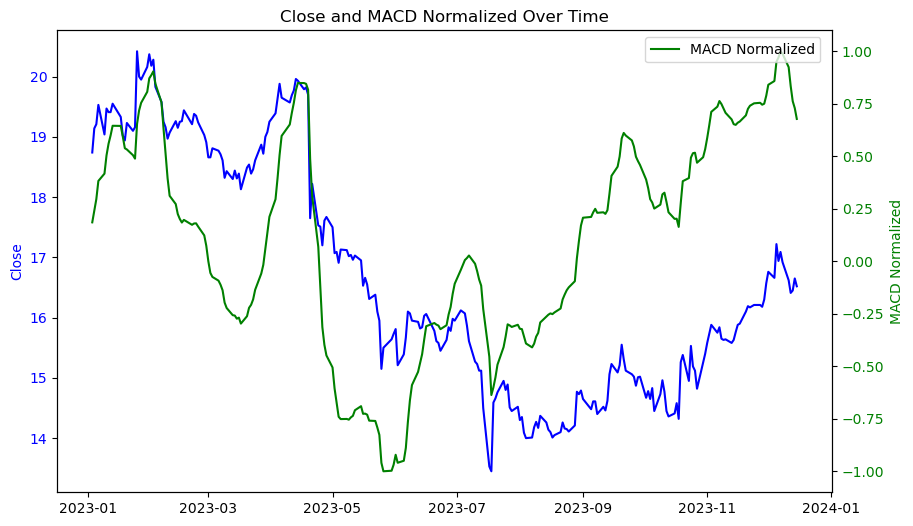

In [81]:
plt.figure(figsize=(10, 6))

# Plotting Close on the first y-axis
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.ylabel('Close', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for macd_norm
ax2 = plt.twinx()
ax2.plot(df['Date'], df['macd_norm'], label='MACD Normalized', color='green')
ax2.set_ylabel('MACD Normalized', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Setting labels and title
plt.title('Close and MACD Normalized Over Time')
plt.xlabel('Date')

# Adding legend
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))

plt.show()

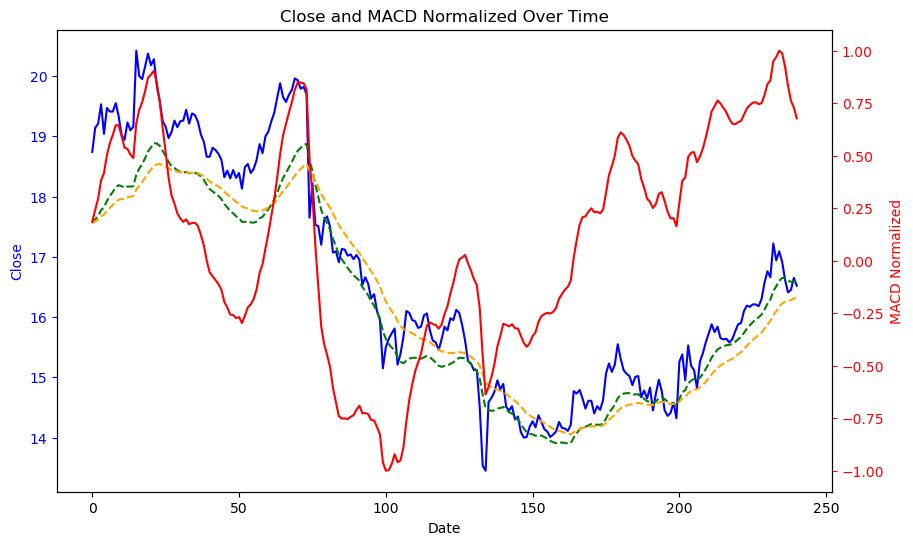

In [82]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Close on the first y-axis
ax1.plot(df.index, df['Close'], color='b', label='Close')
ax1.plot(df.index, df['exp_short'], color='g', linestyle='--', label='Exp Short')
ax1.plot(df.index, df['exp_long'], color='orange', linestyle='--', label='Exp Long')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for macd_norm
ax2 = ax1.twinx()
ax2.plot(df.index, df['macd_norm'], color='r', label='MACD Normalized')
ax2.set_ylabel('MACD Normalized', color='r')
ax2.tick_params('y', colors='r')

plt.title('Close and MACD Normalized Over Time')
plt.show()

In [83]:
initial_capital = 1000
df['position'] = 100 * df['macd_norm'] # renaming macd_norm to position for readability and increasing the weight of the strat
df['position'].at[0] = 0 # we set it to zero since we start with no stock position
df['position_diff'] = df['position'].diff() # gets the difference in positions so we know how to adjust our stock trades
df['position_diff'].at[0] = 0 # set to zero since it's NaN since there is no difference on the first day
df['holdings'] = 0 # represents how much our stock position is worth, starts at 0 since we don't have any stocks yet
df['cash'] = initial_capital # tracks how much cash we have
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,exp_short,exp_long,macd,macd_norm,position,position_diff,holdings,cash,total,cash_needed
0,2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560369,42149200,17.560369,17.560369,0.000000,0.185314,0.000000,0.000000,0,1000,1000.000000,NaN
1,2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800,17.618034,17.588134,0.029900,0.242171,24.217055,24.217055,0,1000,1000.000000,456.975856
2,2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800,17.676919,17.618701,0.058218,0.296019,29.601858,5.384802,0,1000,1006.538570,103.065109
3,2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300640,36050300,17.772876,17.669215,0.103661,0.382431,38.243100,8.641243,0,1000,1012.754989,167.208046
4,2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100,17.823067,17.701059,0.122008,0.417318,41.731756,3.488656,0,1000,1008.548225,67.121734


In [84]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'exp_short', 'exp_long', 'macd', 'macd_norm', 'position',
       'position_diff', 'holdings', 'cash', 'total', 'cash_needed'],
      dtype='object')

<Axes: xlabel='Date'>

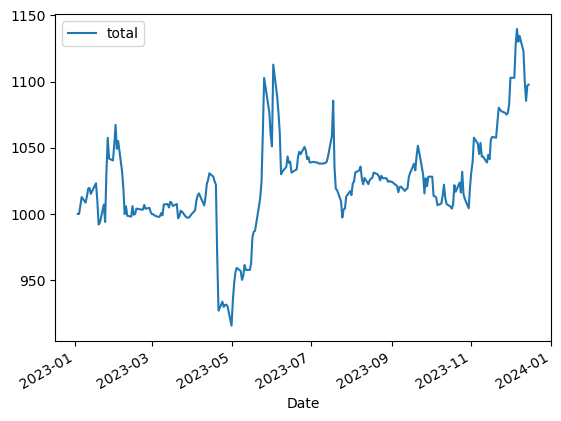

In [88]:
outOfCash = False
debug = True
for index, row in df.iterrows():
    if index==0:
        continue
    cash = df.loc[index -1]['cash']
    position = df.loc[index]['position']
    price = row['Open']
    pos_diff = df.loc[index]['position'] - df.loc[index -1]['position'] 
    cash_needed = pos_diff * price

    df.at[index, 'cash_needed'] = cash_needed


    if (cash > cash_needed) and (not outOfCash):
        cash = cash - cash_needed
    elif (cash_needed < 0):
        cash = cash-cash_needed
        if (cash > (position * price)):
            outOfCash = False
    else:
        # ran out of money
        if (index == 1):
            df[index, position] = cash / price # when we don't have enough money for the initial trade, then we buy the most stock that we can afford
            cash = 0
        else:
            df.at[index,'position'] = df.at[index -1, 'position'] # don't do anything since we are don't have enough money to trade on our startegy
        
        outOfCash = True
    
    df.at[index,'cash'] = cash

df['holdings'] = df['position'] * df['Open']
df['total'] = df['holdings'] + df['cash']
df.plot(x=f'Date', y='total')

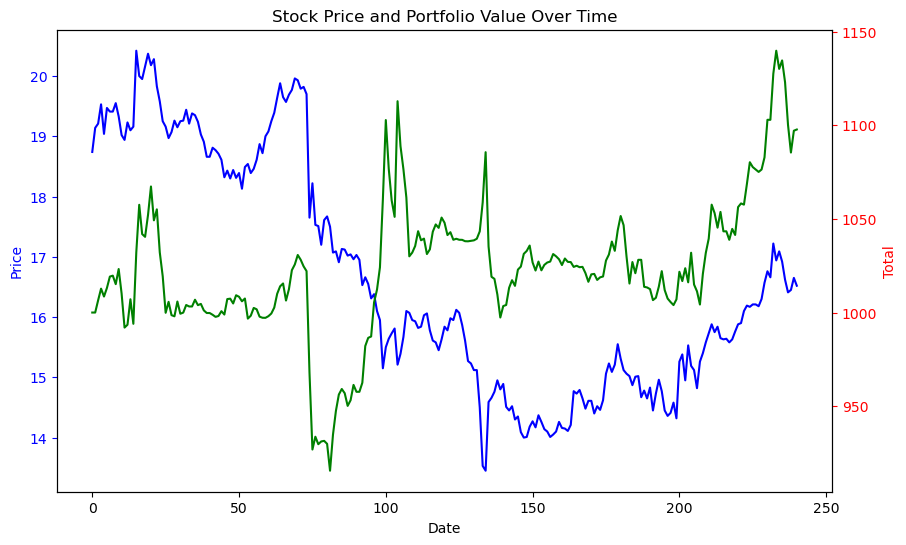

In [93]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['Close'], color='b', label='Price')

ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for macd_norm
ax2 = ax1.twinx()
ax2.plot(df.index, df['total'], color='g', label='Total')

ax2.set_ylabel('Total', color='r')
ax2.tick_params('y', colors='r')

plt.title('Stock Price and Portfolio Value Over Time')
plt.show()

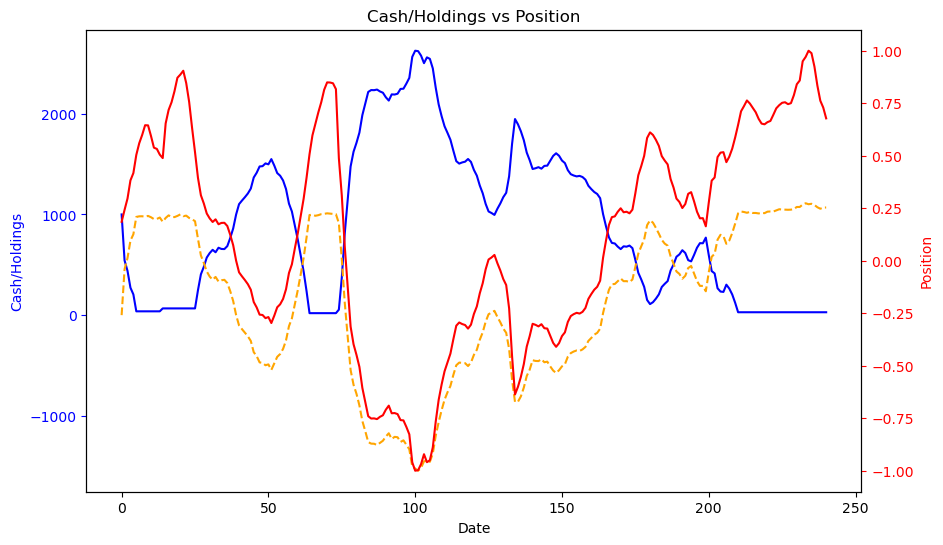

In [95]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['cash'], color='b', label='Cash')
ax1.plot(df.index, df['holdings'], color='orange', linestyle='--', label='Holdings')

ax1.set_xlabel('Date')
ax1.set_ylabel('Cash/Holdings', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for macd_norm
ax2 = ax1.twinx()
ax2.plot(df.index, df['macd_norm'], color='r', label='macd_norm')
# ax2.plot(df.index, df['cash'], color='y', label='cash')
# ax2.plot(df.index, df['holdings'], color='r', label='holdings')
ax2.set_ylabel('Position', color='r')
ax2.tick_params('y', colors='r')

plt.title('Cash/Holdings vs Position')
plt.show()

In [15]:

import math

def repeatedString(s, n):
    # Write your code here
    index = 0
    result = 0
    while index < n:
        if (index >= len(s)):
            exten_idx = index % len(s)
            if (s[exten_idx] == 'a'):
                result = result + 1
            index = index + 1
        else:
            if (s[index] == 'a'):
                result = result + 1
            index = index + 1
    return result

s = "aba"
n = 10


res = repeatedString(s,n)
res

7